# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [2]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

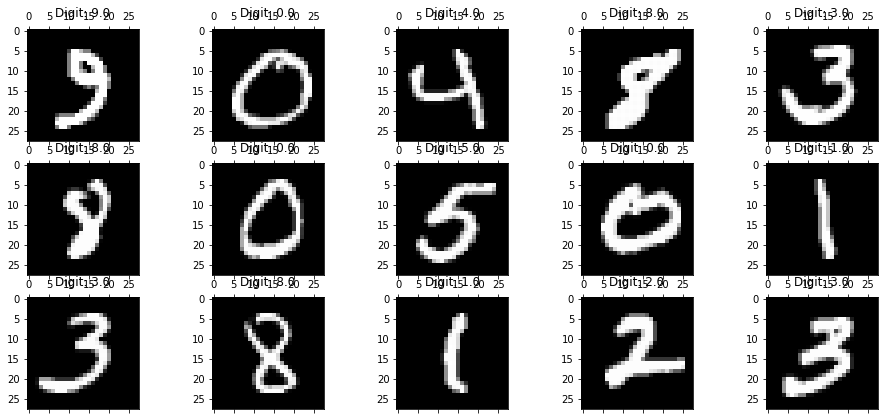

In [10]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

#### PCA : n_component 결정

모든 feature는 0~255의 같은 범위를 가지므로 따로 정규화를 거치지 않겠습니다.

In [7]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=784)
pca_feature = pca.fit_transform(X_train)

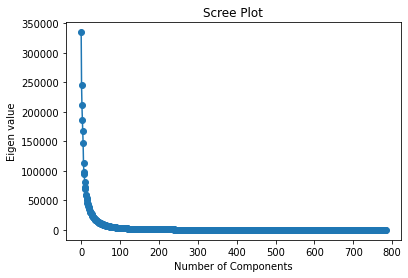

In [32]:
#Elbow point - scree plot

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Eigen value')
plt.plot(pca.explained_variance_, 'o-')

6개이후부터 급격히 eigen value가 줄어드는 것을 볼 수 있습니다.

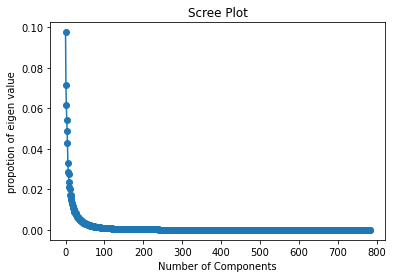

In [34]:
# propotion of eigen value
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('propotion of eigen value')
plt.plot(pca.explained_variance_ratio_, 'o-')

In [8]:
pca = PCA(n_components=6)
pca_feature = pca.fit_transform(X_train) # pca는 n_components 6으로 결정합니다.

#### LDA : n_component 결정

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [54]:
lda = LinearDiscriminantAnalysis(n_components=9, store_covariance=True)
lda_feature = lda.fit_transform(X_train, np.ravel(y_train))

#### n_componentsint, default=None
Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction. 

If None, will be set to min(n_classes - 1, n_features). This parameter only affects the transform method.

최대로 가질 수 있는 component수는 10-1 = 9 이다.

In [55]:
print(lda.coef_)
print(lda.coef_.shape)
print('-'*100)
print(lda.explained_variance_ratio_)

[[ 1.15948735e-17  1.05558269e-16 -4.39895923e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.00334938e-17  4.26258323e-16 -1.59965430e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.57221740e-18  2.01376502e-16 -1.13202862e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 6.93687450e-18 -4.18437960e-16 -5.02621570e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.47973147e-18  3.64743061e-16 -7.18257345e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.09928860e-18 -2.24523322e-16  1.15241064e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(10, 784)
----------------------------------------------------------------------------------------------------
[0.23708117 0.20328823 0.17798282 0.10633489 0.09415639 0.06896763
 0.04990535 0.03507761 0.02720591]


In [57]:
print(lda.covariance_)
print(lda.covariance_.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(784, 784)


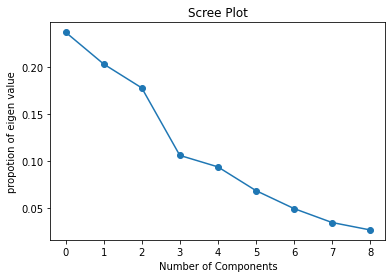

In [50]:
# propotion of eigen value
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('propotion of eigen value')
plt.plot(lda.explained_variance_ratio_, 'o-')

In [10]:
lda = LinearDiscriminantAnalysis(n_components=3, store_covariance=True)
lda_feature = lda.fit_transform(X_train, np.ravel(y_train))

3 이후부터 급격히 하락하므로 n_components를 3으로 설정하겠습니다.

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

#### 원본 데이터

In [17]:
import time

### logistic regression, SVM, dt, rf, gb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [18]:
y_train = np.ravel(y_train)

origin_models = []
origin_models.append(('lr', LogisticRegression(solver='lbfgs', max_iter=50)))
origin_models.append(('dt', DecisionTreeClassifier()))
# origin_models.append(('svm', LinearSVC()))
origin_models.append(('rf', RandomForestClassifier()))
# origin_models.append(('gbm', GradientBoostingClassifier()))

origin_results = []
origin_names = []
for name, model in origin_models:
    start = time.time()
    model.fit(X_train, y_train)
    acc = model.score(X_train, y_train)
    origin_results.append(acc)
    origin_names.append(name)
    print(name,':', acc)
    end = time.time()
    all_time = end - start
    print('time:', all_time)


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


lr : 0.9270178571428571
time: 9.466675043106079
dt : 1.0
time: 27.170323848724365
rf : 1.0
time: 54.032466173172


In [19]:
origin_test_results = []
origin_test_names = []
for name, model in origin_models:
    start = time.time()
    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    origin_test_results.append(acc)
    origin_test_names.append(name)
    print(name,':', acc)
    end = time.time()
    all_time = end - start
    print('time:', all_time)

lr : 0.9197857142857143
time: 0.07380270957946777
dt : 0.8722142857142857
time: 0.04687809944152832
rf : 0.97
time: 0.7251114845275879


#### pca 데이터

In [20]:
y_train = np.ravel(y_train)

pca_models = []
pca_models.append(('lr', make_pipeline(PCA(n_components=6),LogisticRegression())))
pca_models.append(('dt',make_pipeline(PCA(n_components=6),DecisionTreeClassifier())))
# pca_models.append(('svm', LinearSVC()))
pca_models.append(('rf', make_pipeline(PCA(n_components=6),RandomForestClassifier())))
# pca_models.append(('gbm', GradientBoostingClassifier()))

pca_results = []
pca_names = []
for name, model in pca_models:
    start = time.time()
    model.fit(X_train, y_train)
    acc = model.score(X_train, y_train)
    pca_results.append(acc)
    pca_names.append(name)
    print(name,':', acc)
    end = time.time()
    all_time = end - start
    print('time:', all_time)


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


lr : 0.7321607142857143
time: 6.70202374458313
dt : 0.9995
time: 3.4258334636688232
rf : 1.0
time: 20.766451358795166


In [21]:
pca_test_results = []
pca_test_names = []
for name, model in pca_models:
    start = time.time()
    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    pca_test_results.append(acc)
    pca_test_names.append(name)
    print(name,':', acc)
    end = time.time()
    all_time = end - start
    print('time:', all_time)

lr : 0.7367142857142858
time: 0.08876252174377441
dt : 0.7508571428571429
time: 0.07380175590515137
rf : 0.8384285714285714
time: 0.5007152557373047


#### lda 데이터

In [22]:
y_train = np.ravel(y_train)


lda_models = []
lda_models.append(('lr', make_pipeline(LinearDiscriminantAnalysis(n_components=3),LogisticRegression())))
lda_models.append(('dt',make_pipeline(LinearDiscriminantAnalysis(n_components=3),DecisionTreeClassifier())))
# models.append(('svm', SVC()))
lda_models.append(('rf', make_pipeline(LinearDiscriminantAnalysis(n_components=3),RandomForestClassifier())))
# lda_models.append(('gbm', GradientBoostingClassifier()))

lda_results = []
lda_names = []
for name, model in lda_models:
    start = time.time()
    model.fit(X_train, y_train)
    acc = model.score(X_train, y_train)
    lda_results.append(acc)
    lda_names.append(name)
    print(name,':', acc)
    end = time.time()
    all_time = end - start
    print('time:', all_time)


lr : 0.738625
time: 19.12585473060608
dt : 1.0
time: 14.779467105865479
rf : 0.9999464285714286
time: 26.041340351104736


In [23]:
lda_test_results = []
lda_test_names = []
for name, model in lda_models:
    start = time.time()
    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    lda_test_results.append(acc)
    lda_test_names.append(name)
    print(name,':', acc)
    end = time.time()
    all_time = end - start
    print('time:', all_time)

lr : 0.7315714285714285
time: 0.12267112731933594
dt : 0.6598571428571428
time: 0.11070489883422852
rf : 0.734
time: 0.6004478931427002


원본 데이터 + RF의 test accuracy가 0.97로 가장 높습니다. 모델 튜닝을 안해서 그런 것인지 

pca와 lda를 했다고 무조건 성능이 좋아지는 건 아닌 것을 볼 수 있습니다.